Importing all the Libraries

In [9]:
import sympy as sp
import numpy as np
import cdd
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import networkx as nx

Plotting the $K_3 \cup 2K_1$ Graph

(2, <networkx.classes.graph.Graph object at 0x7f86f721e3a0>)


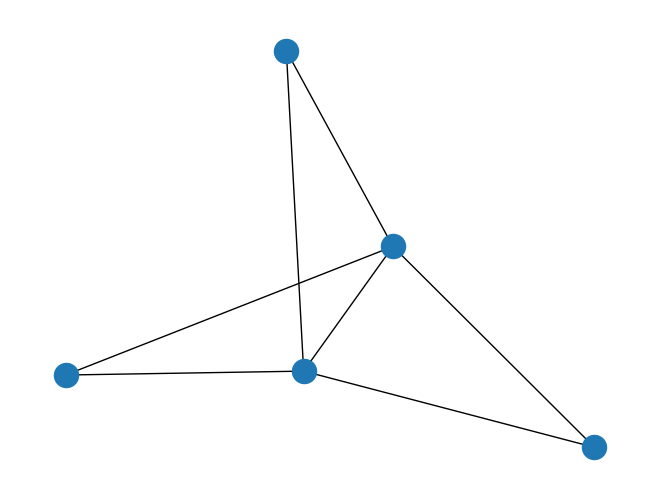

In [10]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([[1, 2], [2, 4], [1, 3], [3, 5], [2, 3], [2, 5], [3, 4]])
pos = nx.spring_layout(G, seed=225)
print(nx.algorithms.approximation.treewidth_min_degree(G))
nx.draw(G, pos)

Creating the Truth Table to extract V-Representation of Correlation Polytope

In [11]:
t_nm = 5 #No. of Vertices for our graph

cor = np.array([[1, 2], [2, 4], [1, 3], [3, 5], [2, 3], [2, 5], [3, 4]]) #list of edges for the graph

def dec_to_bin(num): #converts decimal number to its binary (used for making the truth table)

    s = ''
    for i in range(t_nm):

        s = str(num%2)+s
        num = int(num/2)
    
    return s

A = np.zeros([2**(t_nm), t_nm]) #stores the atomic parts of the truth table

for i in range(2**t_nm):

    bin = dec_to_bin(i)
    for j in range(t_nm):

        A[i][j] = bin[j]

t_cor = len(cor) #No. of edges in the graph
B = np.zeros([2**t_nm, t_cor]) #stores the conjugatiion parts of the truth table

for j in range(2**t_nm):
    for i, c in enumerate(cor):
        B[j][i] = A[j][c[0]-1]*A[j][c[1]-1]

F = np.concatenate((A, B), axis = 1) #stores the complete truth table
F

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.,

Getting the H representation from the V-representation using cdd

In [12]:
F = np.insert(F, 0, 1, axis = 1)

mat = cdd.Matrix(F) #V-representation of correlation polytope
mat.rep_type = cdd.RepType.GENERATOR

poly = cdd.Polyhedron(mat)

Ineq = np.array(poly.get_inequalities()) #Stores H-representation of the correlation polytope

#Next we extract A and b such that the polytope can be written as S=(x|Ax≤b)
b = Ineq[:, 0]
A = -1*Ineq[:, 1:]

Printing out the H-representation

In [13]:
plist = [] #list of symbolic variables to print the facets 

for i in range(t_nm):
    plist.append(sp.symbols("p"+str(i+1)))

for i in range(t_cor):
    plist.append(sp.symbols("q"+str(cor[i][0])+str(cor[i][1])))

plist = np.array(plist)

Expr_ineq  = sp.Matrix(np.matmul(A, plist)) 

for i, j in enumerate(Expr_ineq): #prints the H-representation of the Polytope
    expr = j<=b[i]
    display(expr)

-1.0*q25 <= 0.0

-1.0*q35 <= 0.0

1.0*p2 + 1.0*p3 + 1.0*p5 - 1.0*q23 - 1.0*q25 - 1.0*q35 <= 1.0

-1.0*q12 <= 0.0

-1.0*q13 <= 0.0

-1.0*q23 <= 0.0

1.0*p1 + 1.0*p2 + 1.0*p3 - 1.0*q12 - 1.0*q13 - 1.0*q23 <= 1.0

-1.0*q24 <= 0.0

-1.0*q34 <= 0.0

1.0*p2 + 1.0*p3 + 1.0*p4 - 1.0*q23 - 1.0*q24 - 1.0*q34 <= 1.0

-1.0*p2 + 1.0*q25 <= 0.0

-1.0*p3 + 1.0*q35 <= 0.0

-1.0*p5 - 1.0*q23 + 1.0*q25 + 1.0*q35 <= 0.0

-1.0*p2 + 1.0*q24 <= 0.0

-1.0*p3 + 1.0*q34 <= 0.0

-1.0*p4 - 1.0*q23 + 1.0*q24 + 1.0*q34 <= 0.0

-1.0*p1 + 1.0*q13 <= 0.0

-1.0*p2 + 1.0*q23 <= 0.0

-1.0*p3 - 1.0*q12 + 1.0*q13 + 1.0*q23 <= 0.0

-1.0*p1 + 1.0*q12 <= 0.0

-1.0*p1 + 1.0*q12 + 1.0*q13 - 1.0*q23 <= 0.0

1.0*p2 + 1.0*p3 - 1.0*q23 <= 1.0

-1.0*p2 + 1.0*q12 - 1.0*q13 + 1.0*q23 <= 0.0

-1.0*p2 + 1.0*q12 <= 0.0

1.0*p1 + 1.0*p3 - 1.0*q13 <= 1.0

-1.0*p3 + 1.0*q23 <= 0.0

-1.0*p3 + 1.0*q13 <= 0.0

1.0*p1 + 1.0*p2 - 1.0*q12 <= 1.0

-1.0*p3 + 1.0*q23 - 1.0*q25 + 1.0*q35 <= 0.0

-1.0*p5 + 1.0*q35 <= 0.0

-1.0*p3 + 1.0*q23 - 1.0*q24 + 1.0*q34 <= 0.0

-1.0*p4 + 1.0*q34 <= 0.0

1.0*p3 + 1.0*p5 - 1.0*q35 <= 1.0

-1.0*p2 + 1.0*q23 + 1.0*q25 - 1.0*q35 <= 0.0

-1.0*p2 + 1.0*q23 + 1.0*q24 - 1.0*q34 <= 0.0

1.0*p3 + 1.0*p4 - 1.0*q34 <= 1.0

-1.0*p5 + 1.0*q25 <= 0.0

-1.0*p4 + 1.0*q24 <= 0.0

1.0*p2 + 1.0*p5 - 1.0*q25 <= 1.0

1.0*p2 + 1.0*p4 - 1.0*q24 <= 1.0

Calculating the Volume Ratio Numerically (for the Symmetric Slice)

In [14]:
mrg = np.zeros(t_nm) #stores value of p_i being substituted
t1 = np.linspace(0, 1, 101)[1:100] #Stores the list of value of t (p_i = t) for which the ratio is being calculated
v = [] #stores volumes of local polytope slice
v_ns = [] #stores volumes of the no-signaling slice
lb = []  #stores the number of vertices for the V-representation of the slice

for t in t1:
    c = b.copy()

    for k in range(len(mrg)):
        mrg[k] = t

    for i in range(len(b)):
        for j in range(t_nm):
            c[i] = c[i]-A[i][j]*mrg[j] #substitutes p_i = t in the Inequalities to get a new b (which we call c)
    
    A1 = np.delete(A, [0, 1, 2, 3, 4], axis=1) #removes all p_i

    c = c.reshape(len(c), 1)
    F = np.concatenate((c, -A1), axis = 1) #new H-representation after substitution

    mat = cdd.Matrix(F) #H-representation of sliced polytope
    mat.rep_type = cdd.RepType.INEQUALITY

    poly = cdd.Polyhedron(mat)
    #print(poly.get_generators())

    extr = np.array(poly.get_generators())[:,1:]
    #print(mrg, extr)
    
    #For Higher Dimensional Objects like this the numerical algorithm may struggle to calculate volume for some values of t and give an error. So we put it in a try-catch block to skip calculation for these values
    try:
        volume = ConvexHull(extr).volume #Volume calculation
    except:
        t1 = np.delete(t1, np.where(t1 == t))
        continue
    
    v.append(volume)
    v_ns.append(np.prod([t-max(0, 2*t-1) for k in range(t_cor)]))
    lb.append(len(extr))

Plotting the results

(0.0, 1.0)

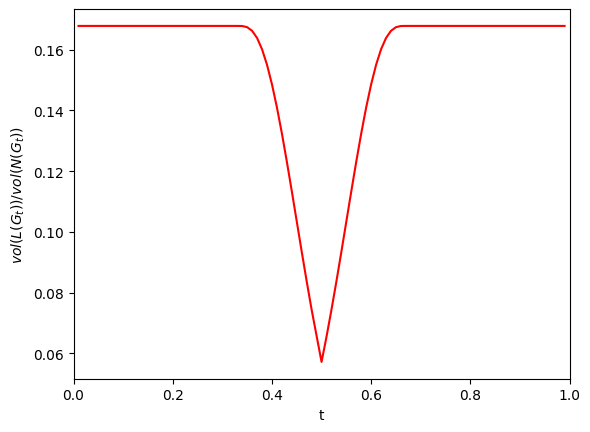

In [15]:
fig, ax = plt.subplots()

ax.plot(t1, np.array(v)/np.array(v_ns), c = "red")
ax.set_xlabel("t")
ax.set_ylabel("$vol(L(G_t))/vol(N(G_t))$")
ax.set_xlim([0, 1])

Saving the V-representation of the Sliced Polytopes in a file to be loaded in Julia 

In [16]:
mrg = np.zeros(t_nm) #stores value of p_i being substituted
t = 0.5 #value of t for which volume ratio needs to be calculated
v = [] #stores volumes of local polytope slice
v_ns = [] #stores volumes of the no-signaling slice
lb = []  #stores the number of vertices for the V-representation of the slice


c = b.copy()

for k in range(len(mrg)):
    mrg[k] = t

for i in range(len(b)):
    for j in range(t_nm):
        c[i] = c[i]-A[i][j]*mrg[j] #substitutes p_i = t in the Inequalities to get a new b (which we call c)

A1 = np.delete(A, [0, 1, 2, 3, 4], axis=1) #removes all p_i

c = c.reshape(len(c), 1)
F = np.concatenate((c, -A1), axis = 1) #new H-representation after substitution
#print(F)

mat = cdd.Matrix(F) #H-representation of sliced polytope
mat.rep_type = cdd.RepType.INEQUALITY

poly = cdd.Polyhedron(mat)

extr = np.array(poly.get_generators()) #getting the H-representation

extr[:, 1:] = extr[:, 1:]/t #equivalent to setting volume of no-signalling slice to 1
print(extr)
np.savetxt("K3U2K1.txt", extr)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 0. 0. 1.]
 [1. 1. 1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
